# ENG2006 Coursework 3

## Instructions

This assignment carries 50\% of the module mark. Completed work should be submitted via eBART by **12 noon on Thursday 06/04/2023**.

#### Asnswering the questions

When answering the questions please keep the following in mind:

+ Your submission should consist of the **present notebook and the `imageModelMLPOpt` and `imageModelCNN` folders created in Question 2 only**, any other files will not be taken into consideration.
+ Each question should be answered in the cell directly after its description. **New cells should not be added to the notebook**.
+ Your questions should consist exclusively of code with comments where necessary.
+ **You should not use any `input` commands**.
+ Whenever requested, **you should use the variable names specified in the description**.

#### Testing your answers

This notebook contains some automated tests, which you can run to test your answers before submission. To do this:

+ Once you have completed each question and executed the corresponding cell, execute the cell directly after it:
    - If your answer passes the tests, a message will appear.
    - If not, an error will be trigered. At the very end of the error message, there will be a possible explanation for why the test failed.
+ Once you have completed all questions, select the option Restart & Run All from the Kernel menu to ensure that all tests can still be pased.

If your answers can pass all the tests and your results seem reasonable, your notebook should be ready for submission. However you should keep in mind that:

+ The tests mainly check that the correct variables are created, and only to a limited extent the validity of the results.
+ Passing the tests does not guarantee the correctness of your solution.
+ Additional tests will be performed after submission.
+ As a result, passing the tests for a specific task does not guarantee that you will be awarded all of the corresponding marks.

#### Submitting your coursework

As mentioned above, your coursework should consist of the present notebook and the `imageModelMLPOpt` and `imageModelCNN` folders to be created in Question 2 only. Once you have answered all of the questions and tested your answers, save the notebook and add it to a .zip file. **Do not include** the `casting_data` folder provided with the notebook.

## Question 1 [40 marks]

<br />
<br />

<div>
<img src="points.png" width="700" align="center">
</div>

The provided `points.txt` and `labels.txt` files contain coordinates and labels for a set of points in the 2D plane, divided in classes as shown above. Follow the steps below to train a neural network to classify these points:

### Question 1-a [3 marks]

Read the points and labels and plot them with different colors for each class. Store the points in a numpy array named `points` and the labels in an array named `pointLabels`.

In [11]:
# YOUR CODE HERE
#raise NotImplementedError()
import numpy as np #import numpy module
import pandas as pd #import pandas module
data_points = np.loadtxt("points.txt")
points = np.array(data_points)
data_pointLabels = np.loadtxt("labels.txt")
pointLabels = np.array(data_pointLabels)


In [12]:
#Run this cell to test your answer for Question 1-a
from tests import question1a

question1a(points,pointLabels)

points and labels seem to be defined properly


### Question 1-b [2 marks]

Divide the data set into three parts by performing:

+ A 50-50 split of the original data resulting in a test set consisting of 50% of the original points. Store the points and labels for the test set in variables named `pointsTest` and `pointLabelsTest` respectively.
+ A 70-30 split of the remaining data resulting in:
    + A training set consisting of 35% of the original data. Store the points and labels for the training set in variables named `pointsTrain` and `pointLabelsTrain` respectively.
    + A validation set consisting of 15% of the original data. Store the points and labels for the validation set in variables named `pointsVal` and `pointLabelsVal` respectively.

In [13]:
# YOUR CODE HERE
#raise NotImplementedError()
from sklearn.model_selection import train_test_split

points50, pointsTest, pointLabels50, pointLabelsTest = train_test_split(points, pointLabels, test_size=0.5, random_state=42)

pointsTrain, pointsVal, pointLabelsTrain, pointLabelsVal = train_test_split(points50, pointLabels50, test_size=0.3, random_state=42)


In [14]:
#Run this cell to test your answer for Question 1-b
from tests import question1b

question1b(pointsTrain,pointsVal,pointsTest,pointLabelsTrain,pointLabelsVal,pointLabelsTest)

Training validation and test sets seem to be defined properly


### Question 1-c [30 marks]

Using tensorflow, train a feedforward neural network to classify the points using hyperparemeter tuning and early stopping. More specifically, your training code should:

+ Consider networks with 1 and 2 hidden layers with ReLU activation.
+ Consider networks with 64, 128 and 256 hidden units in each layer.
+ Train using the Adam optimiser with categorical sparse cross entropy and stop if the loss for the validation set does not improve for more than 10 consecutive iterations.
+ Save the network that achieves the best performance, along with the corresponding loss and accuracy for the validation set, number of hidden layers and number of hidden units.

The final model created by the above process should be named `modelOpt`. Similarly, the corresponding loss and accuracy for the validation set, number of hidden layers and number of hidden units should be named `lossOpt`, `accOpt`, `layersOpt` and `unitsOpt` respectively.

In [15]:
# YOUR CODE HERE
#raise NotImplementedError()
import tensorflow as tf

# Possible hidden unit and layer configurations
hiddenUnits = [64, 128, 256]
hiddenLayers = [1, 2]

# Variables to keep track of the optimal model, loss, accuracy, layers, and units
modelOpt, lossOpt, accOpt, layersOpt, unitsOpt = None, None, None, None, None

# Loop through the possible hidden layer configurations
for num_layers in hiddenLayers:
    for num_units in hiddenUnits:
        # Create a model
        model = tf.keras.Sequential()

        # Add hidden layers
        for _ in range(num_layers):
            model.add(tf.keras.layers.Dense(num_units, activation='relu'))

        # Add final dense layer with softmax activation
        model.add(tf.keras.layers.Dense(3, activation='softmax'))

        # Compile the model
        model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics='accuracy')

        # Early stopping callback
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

        # Train the model
        model.fit(pointsTrain, pointLabelsTrain, validation_data=(pointsVal, pointLabelsVal), epochs=1000, callbacks=[early_stopping], verbose=0)

        # Evaluate the model for the validation set
        lossVal, accVal = model.evaluate(pointsVal, pointLabelsVal, verbose=0)

        # Save the best model, loss, accuracy, layers, and units
        if modelOpt is None or accVal > accOpt:
            modelOpt = model
            lossOpt = lossVal
            accOpt = accVal
            layersOpt = num_layers
            unitsOpt = num_units

# Print details of the optimal model
print('Best loss over validation set:', lossOpt)
print('Best accuracy over validation set:', accOpt)
print('Number of hidden layers selected:', layersOpt)
print('Number of units per layer selected:', unitsOpt)
# import tensorflow as tf

# # Possible hidden layer configurations
# hidden_configs = [(64,), (128,), (256,), (64, 64), (128, 128), (256, 256)]

# # Variables to keep track of the optimal model, loss, accuracy, layers, and units
# modelOpt, lossOpt, accOpt, layersOpt, unitsOpt = None, None, None, None, None

# # Loop through the possible hidden layer configurations
# for config in hidden_configs:
#     # Create a model
#     model = tf.keras.Sequential()

#     # Add hidden layers
#     for units in config:
#         model.add(tf.keras.layers.Dense(units, activation='relu'))

#     # Add final dense layer with softmax activation
#     model.add(tf.keras.layers.Dense(3, activation='softmax'))

#     # Compile the model
#     model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics='accuracy')

#     # Early stopping callback
#     early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#     # Train the model
#     model.fit(pointsTrain, pointLabelsTrain, validation_data=(pointsVal, pointLabelsVal), epochs=1000, callbacks=[early_stopping], verbose=0)

#     # Evaluate the model for the validation set
#     lossVal, accVal = model.evaluate(pointsVal, pointLabelsVal, verbose=0)

#     # Save the best model, loss, accuracy, layers, and units
#     if modelOpt is None or accVal > accOpt:
#         modelOpt = model
#         lossOpt = lossVal
#         accOpt = accVal
#         layersOpt = len(config)
#         unitsOpt = max(config)  # Choose the largest number of units in the optimal model

# # Print details of the optimal model
# print('Best loss over validation set:', lossOpt)
# print('Best accuracy over validation set:', accOpt)
# print('Number of hidden layers selected:', layersOpt)
# print('Number of units per layer selected:', unitsOpt)

Best loss over validation set: 0.19952160120010376
Best accuracy over validation set: 0.9116666913032532
Number of hidden layers selected: 2
Number of units per layer selected: 64


In [19]:
#Run this cell to test your answer for Question 1-c
from tests import question1c

question1c(layersOpt,unitsOpt,lossOpt,accOpt,modelOpt,pointsVal,pointLabelsVal)

19/19 [==============================] - 0s 813us/step - loss: 0.1995 - accuracy: 0.9117
The keras model seems to be defined properly!


### Question 1-d [3 marks]

Evaluate the accuracy and loss of the trained model for the test set and store them in variables named `accTest` and `lossTest` respectively. Then, create and plot the confusion matrix for the test set. Store the matrix as well as the corresponding display object in variables named `pointsConfusionMatrix` and `pointsConfusionMatrixPlot` respectively.

63/63 [==============================] - 0s 583us/step
Test loss: 0.2047426551580429
Test accuracy: 0.9175000190734863


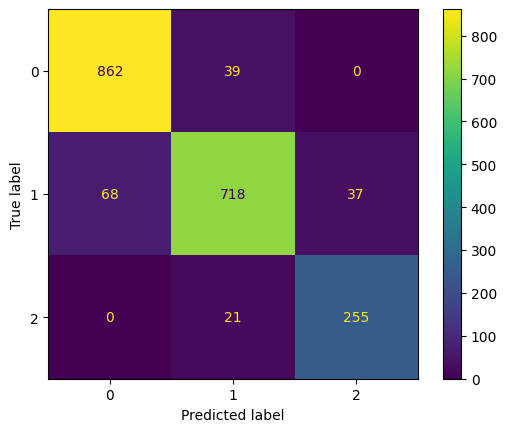

In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluate the model for the test set
lossTest, accTest = modelOpt.evaluate(pointsTest, pointLabelsTest, verbose=0)

# Use the model to predict the labels of the test data as probabilities and convert to integers
labelsPred = modelOpt.predict(pointsTest)
labelsPred = np.argmax(labelsPred, axis=1)

# Create confusion matrix
pointsConfusionMatrix = confusion_matrix(pointLabelsTest, labelsPred)

# Create and show confusion matrix plot
pointsConfusionMatrixPlot = ConfusionMatrixDisplay(confusion_matrix=pointsConfusionMatrix)
pointsConfusionMatrixPlot.plot()

# Print accuracy and loss
print('Test loss:', lossTest)
print('Test accuracy:', accTest)


In [18]:
#Run this cell to test your answer for Question 1-d
from tests import question1d

question1d(accTest,accOpt,lossTest,pointsConfusionMatrix,pointsConfusionMatrixPlot)

The test set accuracy and confusion matrix seem to be defined properly.


### Question 1-e [2 marks]

Using the function provided in lecture 2, create a contour plot of the decision boundary for the trained model.

1250/1250 [==============================] - 1s 857us/step


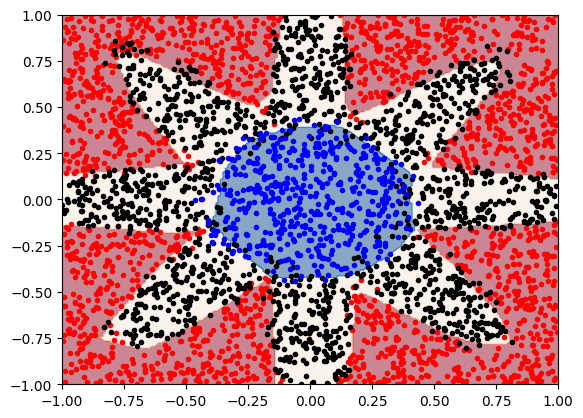

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def plotDecisionBoundary(model,limx=[-1,1], limy=[-1,1], resolution=200, colormap='RdBu'):
    fig, ax = plt.subplots(1, 1)

    xPoints = np.linspace(limx[0], limx[1], resolution)
    yPoints = np.linspace(limy[0], limy[1], resolution)

    xx, yy = np.meshgrid(xPoints, yPoints)
    
    modelPred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    if len(modelPred.shape) == 2 and modelPred.shape[1] != 1:
        modelPred = np.argmax(modelPred, axis=1)
    else:
        modelPred = modelPred > 0.5

    z = modelPred.reshape(xx.shape)
    ax.contourf(xx, yy, z, cmap=colormap, alpha=0.5)

    return fig, ax

fig, ax = plotDecisionBoundary(modelOpt)

class0 = np.argwhere(pointLabels == 0)
class1 = np.argwhere(pointLabels == 1)
class2 = np.argwhere(pointLabels == 2)

ax.plot(points[class0, 0], points[class0, 1], '.r')
ax.plot(points[class1, 0], points[class1, 1], '.k')
ax.plot(points[class2, 0], points[class2, 1], '.b')

plt.show()

## Question 2 [60 marks]

<br />
<br />

<div>
<img src="components.png" width="600" align="center">
</div>

The accompanying `casting_data` folder contains images of defective and pristine cast components downloaded from [kaggle](https://www.kaggle.com/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product). Images are provided in a size of 300 x 300 pixels, while the dataset is already split into training and testing parts, stored in the corresponding folders (`train` and `test` respectively). Within each folder, two folders can be found containing images of the defective and pristine components (`def_front` and `ok_front` respectively).

### Question 2-a [3 marks]

Using the function provided in lecture 3, read the files as grayscale images, resize them to 150 x 150 pixels and plot one image from each set. Store the images and the labels in variables named `imagesTrain`, `imageLabelsTrain`,`imagesTest`, `imageLabelsTest` respectively.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
#Run this cell to test your answer for Question 2-a
%load_ext autoreload
%autoreload 2
from tests import question2a

question2a(imagesTrain,imageLabelsTrain,imagesTest,imageLabelsTest)

### Question 2-b [2 marks]

Normalise all the data and further split the training set into training and validation parts (75-25 split).

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
#Run this cell to test your answer for Question 2-b
from tests import question2b

question2b(imagesTest,imageLabelsTest,imagesTrain,imageLabelsTrain,imagesVal,imageLabelsVal)

### Question 2-c [15 marks]

Using tensorflow, train a feedforward neural network to classify the images using hyperparemeter tuning and early stopping. More specifically, you should chose an appropriate number of hidden units for the network, while your training code should:

+ Consider networks with 2, 4 and 8 hidden layers with ReLU activation.
+ Train using the Adam optimiser with categorical sparse cross entropy and stop if the loss for the validation set does not improve for more than 5 consecutive iterations.
+ Save the network that achieves the best performance, along with the corresponding loss and accuracy for the validation set, number of hidden layers and number of hidden units.

The final model created by the above process should be named `imageModelOpt`.

Add your training code in the next cell, without deleting the last line. The last line will save your model such that it can be reused without having to repeat training. The model will be saved in a folder named `imageModelMLPOpt`, which has to be submitted along with the notebook. **Full marks cannot be awarded if this file is missing**.

When selecting number of hidden units, you should take into account that an excessive number of hidden units might increase the size of the `imageModelMLPOpt` folder beyond the limit allowed in BART.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#DO NOT delete the following line, it saves your network once it has been trained so that it can be re-used
imageModelMLPOpt.save('imageModelMLPOpt')

Once your model has successfully trained, evaluate its accuracy and loss for the test set in the following cell and save them in variables named `imageMLPLossTest` and `imageMLPAccTest` respectively. Again, do not delete the first three lines of this file since they are necessary for your answer to be properly marked.

In [ ]:
#DO NOT delete the following lines, they load your previously trained model
import tensorflow as tf
imageModelMLPOpt = tf.keras.models.load_model('imageModelMLPOpt')

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
#Run this cell to test your answer for Question 2-c
from tests import question2c

question2c(imageModelMLPOpt,imageMLPLossTest,imageMLPAccTest,imagesTest,imageLabelsTest)

### Quesion 2-d [20 marks]

Using tensorflow, train a convolutional neural network to classify the images. The network should:

- Include two convolutional layers with no more than 128 filters, each followed by a max pooling layer.
- Include a number of dense layers and hidden units of your choice.
- Employ early stopping.
- Train within less than 10-15 minutes. Since the exact timing might change in different computers, this requirement is not strict.
- Achieve at least 95% accuracy for the test set. The loss and accuracy obtained for the test set should be stored in variables named `imageCNNAccTest` and `imageCNNLossTest`.

Determining the exact architecture of the network might require some experimentation. Your submission should only include the final architecture chosen, stored in a model named `imageModelCNN`.

Add your training code in the next cell, without deleting the last line. The last line will save your model such that it can be reused without having to repeat training. The model will be saved in a folder named `imageModelCNN`, which has to be submitted along with the notebook. **Full marks cannot be awarded if this file is missing**.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#DO NOT delete the following line, it saves your network once it has been trained so that it can be re-used
imageModelCNN.save('imageModelCNN')

Once your model has successfully trained, evaluate its accuracy and loss for the test set in the following cell. Again, do not delete the first three lines of this file since they are necessary for your answer to be properly marked.

In [ ]:
#DO NOT delete the following lines, they load your previously trained model
import tensorflow as tf
imageModelCNN = tf.keras.models.load_model('imageModelCNN')

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
#Run this cell to test your answer for Question 2-d
from tests import question2d

question2d(imageModelCNN,imageCNNLossTest,imageCNNAccTest,imagesTest,imageLabelsTest)

### Question 2-e [15 marks]

- **A.** Justify your choices for the number of hidden units in **Question 2-c** and the architecture of the neural network of **Question 2-d**.
- **B.** Comment on the comparison between the two alternatives (the feedforward neural network of **Question 2-c** and the convolutional neural network of **Question 2-d**), and with justification propose the most suitable one.

YOUR ANSWER HERE

### Question 2-f [5marks]

For the first 4 images of the test set, visualise the output of the first 2 filters of each of the convolutional layers of the network of **Question 2-d**.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()